In [1]:
import pandas as pd
import requests
import json
import matplotlib

%matplotlib inline

In [2]:
url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/all-access/all-agents/daily/20170101/20191231"
headers = {"accept": "application/json"}

In [3]:
r = requests.get(url, headers=headers)

In [4]:
r

<Response [200]>

In [5]:
r.text

'{"items":[{"project":"en.wikipedia","access":"all-access","agent":"all-agents","granularity":"daily","timestamp":"2017010100","views":313899249},{"project":"en.wikipedia","access":"all-access","agent":"all-agents","granularity":"daily","timestamp":"2017010200","views":342445276},{"project":"en.wikipedia","access":"all-access","agent":"all-agents","granularity":"daily","timestamp":"2017010300","views":328451210},{"project":"en.wikipedia","access":"all-access","agent":"all-agents","granularity":"daily","timestamp":"2017010400","views":319421029},{"project":"en.wikipedia","access":"all-access","agent":"all-agents","granularity":"daily","timestamp":"2017010500","views":323265393},{"project":"en.wikipedia","access":"all-access","agent":"all-agents","granularity":"daily","timestamp":"2017010600","views":309547092},{"project":"en.wikipedia","access":"all-access","agent":"all-agents","granularity":"daily","timestamp":"2017010700","views":322272812},{"project":"en.wikipedia","access":"all-acce

In [6]:
r.json()

{'items': [{'project': 'en.wikipedia',
   'access': 'all-access',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2017010100',
   'views': 313899249},
  {'project': 'en.wikipedia',
   'access': 'all-access',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2017010200',
   'views': 342445276},
  {'project': 'en.wikipedia',
   'access': 'all-access',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2017010300',
   'views': 328451210},
  {'project': 'en.wikipedia',
   'access': 'all-access',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2017010400',
   'views': 319421029},
  {'project': 'en.wikipedia',
   'access': 'all-access',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2017010500',
   'views': 323265393},
  {'project': 'en.wikipedia',
   'access': 'all-access',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2017010600',
   'views': 309547092},
  {'pro

In [7]:
type(r.json())

dict

In [10]:
r.json().keys()

dict_keys(['items'])

In [11]:
r.json()["items"]

[{'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2017010100',
  'views': 313899249},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2017010200',
  'views': 342445276},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2017010300',
  'views': 328451210},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2017010400',
  'views': 319421029},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2017010500',
  'views': 323265393},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2017010600',
  'views': 309547092},
 {'project': 'en.wikipedia',
  'access': 'all-access

In [12]:
type(r.json()["items"])

list

In [14]:
df = pd.DataFrame(r.json()["items"])

In [15]:
df

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,all-access,all-agents,daily,2017010100,313899249
1,en.wikipedia,all-access,all-agents,daily,2017010200,342445276
2,en.wikipedia,all-access,all-agents,daily,2017010300,328451210
3,en.wikipedia,all-access,all-agents,daily,2017010400,319421029
4,en.wikipedia,all-access,all-agents,daily,2017010500,323265393
...,...,...,...,...,...,...
1090,en.wikipedia,all-access,all-agents,daily,2019122700,296547310
1091,en.wikipedia,all-access,all-agents,daily,2019122800,298960227
1092,en.wikipedia,all-access,all-agents,daily,2019122900,309414913
1093,en.wikipedia,all-access,all-agents,daily,2019123000,321844883


In [16]:
df.dtypes

project        object
access         object
agent          object
granularity    object
timestamp      object
views           int64
dtype: object

In [18]:
pd.to_datetime(df["timestamp"])

ParserError: year 2017010100 is out of range: 2017010100

In [26]:
df["timestamp"].str.slice(-2).value_counts()

00    1095
Name: timestamp, dtype: int64

We validated that the last two positions in the timestamp columns are always '00'

In [28]:
pd.to_datetime(df["timestamp"].str.slice(stop=8))

0      2017-01-01
1      2017-01-02
2      2017-01-03
3      2017-01-04
4      2017-01-05
          ...    
1090   2019-12-27
1091   2019-12-28
1092   2019-12-29
1093   2019-12-30
1094   2019-12-31
Name: timestamp, Length: 1095, dtype: datetime64[ns]

In [29]:
df["timestamp"] = pd.to_datetime(df["timestamp"].str.slice(stop=8))

In [31]:
df.dtypes

project                object
access                 object
agent                  object
granularity            object
timestamp      datetime64[ns]
views                   int64
dtype: object

In [52]:
df[["timestamp", "views"]].set_index("timestamp")

,views
timestamp,
2017-01-01,313899249
2017-01-02,342445276
2017-01-03,328451210
2017-01-04,319421029
2017-01-05,323265393
...,...
2019-12-27,296547310
2019-12-28,298960227
2019-12-29,309414913


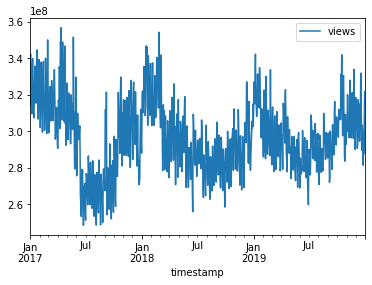

In [35]:
# Plot daily pageviews
df[["timestamp", "views"]].set_index("timestamp").plot();

## Define a function that gets data from wikimedia for each access type

In [44]:
access_types = ["desktop", "mobile-app", "mobile-web"]

def wiki_to_df(access_type):
    url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/{access_type}/all-agents/daily/20170101/20191231"
    headers = {"accept": "application/json"}
    
    resp = requests.get(url, headers=headers)
    tdf = pd.DataFrame(resp.json()["items"])
    tdf["timestamp"] = pd.to_datetime(tdf["timestamp"].str.slice(stop=8))
    return tdf

In [45]:
wiki_to_df(access_types[1])

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-app,all-agents,daily,2017-01-01,7742504
1,en.wikipedia,mobile-app,all-agents,daily,2017-01-02,7131737
2,en.wikipedia,mobile-app,all-agents,daily,2017-01-03,5902111
3,en.wikipedia,mobile-app,all-agents,daily,2017-01-04,5398209
4,en.wikipedia,mobile-app,all-agents,daily,2017-01-05,6061029
...,...,...,...,...,...,...
1090,en.wikipedia,mobile-app,all-agents,daily,2019-12-27,5270968
1091,en.wikipedia,mobile-app,all-agents,daily,2019-12-28,5592373
1092,en.wikipedia,mobile-app,all-agents,daily,2019-12-29,6018164
1093,en.wikipedia,mobile-app,all-agents,daily,2019-12-30,5430936


In [46]:
df_desktop = wiki_to_df("desktop")
df_mobile_app = wiki_to_df("mobile-app")
df_mobile_web = wiki_to_df("mobile-web")

In [47]:
df_desktop

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,all-agents,daily,2017-01-01,159850625
1,en.wikipedia,desktop,all-agents,daily,2017-01-02,183451949
2,en.wikipedia,desktop,all-agents,daily,2017-01-03,188963991
3,en.wikipedia,desktop,all-agents,daily,2017-01-04,187382654
4,en.wikipedia,desktop,all-agents,daily,2017-01-05,192488258
...,...,...,...,...,...,...
1090,en.wikipedia,desktop,all-agents,daily,2019-12-27,134979884
1091,en.wikipedia,desktop,all-agents,daily,2019-12-28,127967591
1092,en.wikipedia,desktop,all-agents,daily,2019-12-29,130540209
1093,en.wikipedia,desktop,all-agents,daily,2019-12-30,157783621


In [53]:
# concat all three dataframes
df_detail = (pd
             .concat([df_desktop, df_mobile_app, df_mobile_web])
             .sort_values(["timestamp", "access"])
             .reset_index(drop=True))

## Plot daily views

In [57]:
df_detail[:15]

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,all-agents,daily,2017-01-01,159850625
1,en.wikipedia,mobile-app,all-agents,daily,2017-01-01,7742504
2,en.wikipedia,mobile-web,all-agents,daily,2017-01-01,146306120
3,en.wikipedia,desktop,all-agents,daily,2017-01-02,183451949
4,en.wikipedia,mobile-app,all-agents,daily,2017-01-02,7131737
5,en.wikipedia,mobile-web,all-agents,daily,2017-01-02,151861590
6,en.wikipedia,desktop,all-agents,daily,2017-01-03,188963991
7,en.wikipedia,mobile-app,all-agents,daily,2017-01-03,5902111
8,en.wikipedia,mobile-web,all-agents,daily,2017-01-03,133585108
9,en.wikipedia,desktop,all-agents,daily,2017-01-04,187382654


In [55]:
df_detail.groupby("timestamp").sum()

,views
timestamp,
2017-01-01,313899249
2017-01-02,342445276
2017-01-03,328451210
2017-01-04,319421029
2017-01-05,323265393
...,...
2019-12-27,296547310
2019-12-28,298960227
2019-12-29,309414913


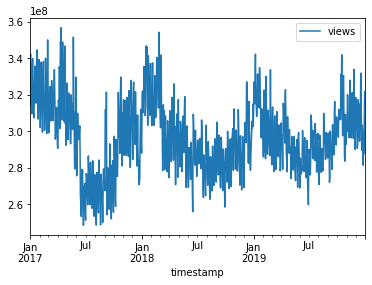

In [61]:
df_detail.groupby("timestamp").sum().plot();

## Get monthly views

In [68]:
df["timestamp"].dt.month

0        1
1        1
2        1
3        1
4        1
        ..
1090    12
1091    12
1092    12
1093    12
1094    12
Name: timestamp, Length: 1095, dtype: int64

In [71]:
(df_detail
 .assign(year=df_detail["timestamp"].dt.year)
 .assign(month=df_detail["timestamp"].dt.month))

,project,access,agent,granularity,timestamp,views,year,month
0,en.wikipedia,desktop,all-agents,daily,2017-01-01,159850625,2017,1
1,en.wikipedia,mobile-app,all-agents,daily,2017-01-01,7742504,2017,1
2,en.wikipedia,mobile-web,all-agents,daily,2017-01-01,146306120,2017,1
3,en.wikipedia,desktop,all-agents,daily,2017-01-02,183451949,2017,1
4,en.wikipedia,mobile-app,all-agents,daily,2017-01-02,7131737,2017,1
...,...,...,...,...,...,...,...,...
3280,en.wikipedia,mobile-app,all-agents,daily,2019-12-30,5430936,2019,12
3281,en.wikipedia,mobile-web,all-agents,daily,2019-12-30,158630326,2019,12
3282,en.wikipedia,desktop,all-agents,daily,2019-12-31,133855339,2019,12
3283,en.wikipedia,mobile-app,all-agents,daily,2019-12-31,4921578,2019,12


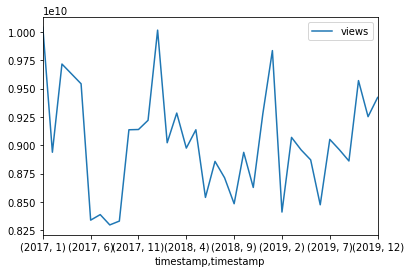

In [75]:
df_detail.groupby([df_detail["timestamp"].dt.year, df_detail["timestamp"].dt.month]).sum().plot();

Works! but we want the x-axis to be datetimes

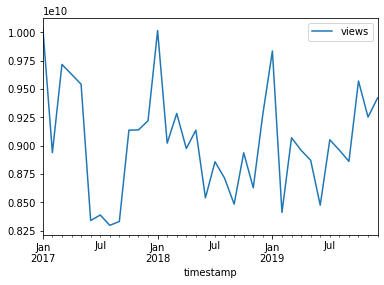

In [80]:
(df_detail
 .set_index("timestamp")
 .resample("M")
 .sum()
 .plot());

## Get yearly views

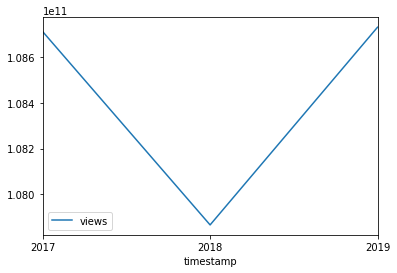

In [81]:
(df_detail
 .set_index("timestamp")
 .resample("Y")
 .sum()
 .plot());

In [84]:
(df_detail
 .set_index("timestamp")
 .resample("Y"))

## Get monthly views by access type

In [82]:
df_detail

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,all-agents,daily,2017-01-01,159850625
1,en.wikipedia,mobile-app,all-agents,daily,2017-01-01,7742504
2,en.wikipedia,mobile-web,all-agents,daily,2017-01-01,146306120
3,en.wikipedia,desktop,all-agents,daily,2017-01-02,183451949
4,en.wikipedia,mobile-app,all-agents,daily,2017-01-02,7131737
...,...,...,...,...,...,...
3280,en.wikipedia,mobile-app,all-agents,daily,2019-12-30,5430936
3281,en.wikipedia,mobile-web,all-agents,daily,2019-12-30,158630326
3282,en.wikipedia,desktop,all-agents,daily,2019-12-31,133855339
3283,en.wikipedia,mobile-app,all-agents,daily,2019-12-31,4921578


In [90]:
df["timestamp"].dt.to_period("M")

0       2017-01
1       2017-01
2       2017-01
3       2017-01
4       2017-01
         ...   
1090    2019-12
1091    2019-12
1092    2019-12
1093    2019-12
1094    2019-12
Name: timestamp, Length: 1095, dtype: period[M]

In [92]:
(df_detail
 .groupby(["access", df["timestamp"].dt.to_period("M")])
 .sum()
 .reset_index())

,access,timestamp,views
0,desktop,2017-01,2003892522
1,desktop,2017-02,1650446872
2,desktop,2017-03,1853126822
3,desktop,2017-04,1846076736
4,desktop,2017-05,1987400885
...,...,...,...
103,mobile-web,2019-08,1238633914
104,mobile-web,2019-09,1215429085
105,mobile-web,2019-10,1208932889
106,mobile-web,2019-11,1178565186


In [103]:
(df_detail
 .groupby([df["timestamp"].dt.to_period("M"), "access"])
 .sum()).unstack()
# .reset_index()).unstack()

views                       
access        desktop mobile-app  mobile-web
timestamp                                   
2017-01    2003892522   65712888  1373492180
2017-02    1650446872   68805278  1159406743
2017-03    1853126822   70842385  1471576082
2017-04    1846076736   66981495  1268019207
2017-05    1987400885   68874975  1293630107
2017-06    1876457978   65756078  1297388955
2017-07    1781686789   72573366  1262827154
2017-08    1867202352   69620201  1412059944
2017-09    1760303034   39908854  1230943833
2017-10    2175584457   37990180  1256509090
2017-11    1879122214   38616505  1333562323
2017-12    1865621817   41858380  1236068245
2018-01    1869575656   37032455  1280435685
2018-02    1841977928   35543415  1104262194
2018-03    1795569264   42134689  1198220499
2018-04    1704779787   39232912  1187526155
2018-05    1520391075   38241247  1297694898
2018-06    1427172607   38478255  1146894494
2018-07    1651655439   40335436  1191630303
2018-08    1466834166   43500032  1167416339
2018-09    1499765579   39842490  1195447993
2018-10    1475679975   38439364  1254884864
2018-11    1457640665   39730933  1183745570
2018-12    1683367244   37352763  1127139130
2019-01    1644513743   43416006  1188301684
2019-02    1406408889   33814908  1150467988
2019-03    1659514306   37384275  1148010439
2019-04    1632147469   37935763  1180893474
2019-05    1772015570   40156331  1141426293
2019-06    1838622806   37488392  1202513419
2019-07    1838414348   36208622  1298132847
2019-08    1945120898   38774951  1238633914
2019-09    1783071184   37969715  1215429085
2019-10    1837773950   41348055  1208932889
2019-11    1741834681   36071701  1178565186
2019-12    1517241692   43587563  1431225396

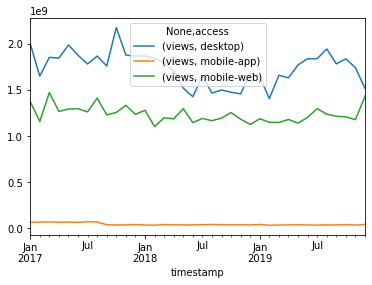

In [104]:
(df_detail
 .groupby([df["timestamp"].dt.to_period("M"), "access"])
 .sum()).unstack().plot();
# .reset_index()).unstack()